In [187]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectKBest, mutual_info_classif

import matplotlib.pyplot as plt
import seaborn as sns

In [188]:
import warnings
warnings.filterwarnings('ignore')

In [189]:
url='https://drive.google.com/file/d/1a1pWKh9W3jpNuSs0j8AcRsJsEBxmX4SV/view?usp=share_link'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
assessments = pd.read_csv(url)

url='https://drive.google.com/file/d/10DJXVfaf1B9B9LoebzbBEV7DUrJbPh6l/view?usp=share_link'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
courses = pd.read_csv(url)

url='https://drive.google.com/file/d/1Rcl06lqRpzj-5oH-Chws_-562wyNANWz/view?usp=share_link'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
studentAssessment = pd.read_csv(url)

url='https://drive.google.com/file/d/1U_RE2G_ELFhR_YeyXt2cGF_W69Lu6IJC/view?usp=share_link'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
studentInfo = pd.read_csv(url)

url='https://drive.google.com/file/d/1nbUgYN4WBFq_KJuFm9_vUm9je5YiZX6E/view?usp=share_link'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
studentRegistration = pd.read_csv(url)

#url='https://drive.google.com/file/d/1dWdzGnVhEUQVByx3t5V-WeMxF2hbVhnt/view?usp=share_link'
#url='https://drive.google.com/uc?id=' + url.split('/')[-2]
url='https://drive.google.com/uc?export=download&confirm=yTib&id=1dWdzGnVhEUQVByx3t5V-WeMxF2hbVhnt'
studentVle = pd.read_csv(url)

url='https://drive.google.com/file/d/1A765faofjN_v8XBIXt_0BBGR1QSz1Rw4/view?usp=share_link'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
vle = pd.read_csv(url)

# Početni pregled svih 7 tablica, pregled tipova podataka i deskriptivna statistika.

## assessments.csv

In [190]:
print(assessments.columns.values)
print(assessments.head())
print()
print(assessments.info())
print()
print(assessments.describe())
print()
print(assessments.isna().sum())
print()
print()

#ubaci srednju vrijednost 'date' tamo gdje nedostaje ta informacija
X_tmp = assessments.copy()
X_tmp.loc[X_tmp.date.isna(),'date'] = X_tmp.loc[:,'date'].mean()

#vidimo da sad nema nedostajućih vrijednosti u stupcu date
print(X_tmp.isna().sum())


['code_module' 'code_presentation' 'id_assessment' 'assessment_type'
 'date' 'weight']
  code_module code_presentation  id_assessment assessment_type   date  weight
0         AAA             2013J           1752             TMA   19.0    10.0
1         AAA             2013J           1753             TMA   54.0    20.0
2         AAA             2013J           1754             TMA  117.0    20.0
3         AAA             2013J           1755             TMA  166.0    20.0
4         AAA             2013J           1756             TMA  215.0    30.0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206 entries, 0 to 205
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   code_module        206 non-null    object 
 1   code_presentation  206 non-null    object 
 2   id_assessment      206 non-null    int64  
 3   assessment_type    206 non-null    object 
 4   date               195 non-null    float64
 5  

## courses.csv

In [191]:
print(courses.head())
print()
print(courses.info())
print()
print(courses.describe())
print()
print(courses.isna().sum())

  code_module code_presentation  module_presentation_length
0         AAA             2013J                         268
1         AAA             2014J                         269
2         BBB             2013J                         268
3         BBB             2014J                         262
4         BBB             2013B                         240

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 3 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   code_module                 22 non-null     object
 1   code_presentation           22 non-null     object
 2   module_presentation_length  22 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 656.0+ bytes
None

       module_presentation_length
count                   22.000000
mean                   255.545455
std                     13.654677
min                    234.000000
25%                    241

## studentAssessment.csv

In [192]:
print(studentAssessment.head())
print()
print(studentAssessment.info())
print()
print(studentAssessment.describe())
print()
print(studentAssessment.isna().sum())
studentAssessment.dropna(inplace=True)
studentAssessment2 = studentAssessment[studentAssessment['id_assessment'] == 1752].drop(columns=['is_banked', 'date_submitted'])
display(studentAssessment2)

   id_assessment  id_student  date_submitted  is_banked  score
0           1752       11391              18          0   78.0
1           1752       28400              22          0   70.0
2           1752       31604              17          0   72.0
3           1752       32885              26          0   69.0
4           1752       38053              19          0   79.0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173912 entries, 0 to 173911
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id_assessment   173912 non-null  int64  
 1   id_student      173912 non-null  int64  
 2   date_submitted  173912 non-null  int64  
 3   is_banked       173912 non-null  int64  
 4   score           173739 non-null  float64
dtypes: float64(1), int64(4)
memory usage: 6.6 MB
None

       id_assessment    id_student  date_submitted      is_banked  \
count  173912.000000  1.739120e+05   173912.000000  173912.00000

,id_assessment,id_student,score
0,1752,11391,78.0
1,1752,28400,70.0
2,1752,31604,72.0
3,1752,32885,69.0
4,1752,38053,79.0
...,...,...,...
354,1752,2688067,70.0
355,1752,2689958,86.0
356,1752,2691206,86.0
357,1752,2694424,89.0


## studentInfo.csv

In [193]:
print(studentInfo.head())
print()
print(studentInfo.info())
print()
print(studentInfo.describe())
print()
print(studentInfo.isna().sum())
print("-------------------")
studentInfo.dropna(inplace=True)
studentInfo5 = studentInfo.drop(columns=['studied_credits', 'code_presentation', 'region', 'imd_band'])
display(studentInfo5)
gender = {'M': 1,'F': 0}
disability = {'Y': 1,'N': 0}

display(studentInfo5)
studentInfo2 = studentInfo5.groupby(['id_student']).sum()
display(studentInfo2)
studentInfo3 = studentInfo5.drop(columns=['num_of_prev_attempts'])
#studentInfo.drop_duplicates(inplace=True)
#parametar keep last
studentInfo4 = pd.merge(studentInfo2, studentInfo3, on="id_student")
studentInfo4.gender = [gender[item] for item in studentInfo4.gender]
studentInfo4.disability = [disability[item] for item in studentInfo4.disability]
display(studentInfo4)



  code_module code_presentation  id_student gender                region  \
0         AAA             2013J       11391      M   East Anglian Region   
1         AAA             2013J       28400      F              Scotland   
2         AAA             2013J       30268      F  North Western Region   
3         AAA             2013J       31604      F     South East Region   
4         AAA             2013J       32885      F  West Midlands Region   

       highest_education imd_band age_band  num_of_prev_attempts  \
0       HE Qualification  90-100%     55<=                     0   
1       HE Qualification   20-30%    35-55                     0   
2  A Level or Equivalent   30-40%    35-55                     0   
3  A Level or Equivalent   50-60%    35-55                     0   
4     Lower Than A Level   50-60%     0-35                     0   

   studied_credits disability final_result  
0              240          N         Pass  
1               60          N         Pass  

,code_module,id_student,gender,highest_education,age_band,num_of_prev_attempts,disability,final_result
0,AAA,11391,M,HE Qualification,55<=,0,N,Pass
1,AAA,28400,F,HE Qualification,35-55,0,N,Pass
2,AAA,30268,F,A Level or Equivalent,35-55,0,Y,Withdrawn
3,AAA,31604,F,A Level or Equivalent,35-55,0,N,Pass
4,AAA,32885,F,Lower Than A Level,0-35,0,N,Pass
...,...,...,...,...,...,...,...,...
32588,GGG,2640965,F,Lower Than A Level,0-35,0,N,Fail
32589,GGG,2645731,F,Lower Than A Level,35-55,0,N,Distinction
32590,GGG,2648187,F,A Level or Equivalent,0-35,0,Y,Pass
32591,GGG,2679821,F,Lower Than A Level,35-55,0,N,Withdrawn


,code_module,id_student,gender,highest_education,age_band,num_of_prev_attempts,disability,final_result
0,AAA,11391,M,HE Qualification,55<=,0,N,Pass
1,AAA,28400,F,HE Qualification,35-55,0,N,Pass
2,AAA,30268,F,A Level or Equivalent,35-55,0,Y,Withdrawn
3,AAA,31604,F,A Level or Equivalent,35-55,0,N,Pass
4,AAA,32885,F,Lower Than A Level,0-35,0,N,Pass
...,...,...,...,...,...,...,...,...
32588,GGG,2640965,F,Lower Than A Level,0-35,0,N,Fail
32589,GGG,2645731,F,Lower Than A Level,35-55,0,N,Distinction
32590,GGG,2648187,F,A Level or Equivalent,0-35,0,Y,Pass
32591,GGG,2679821,F,Lower Than A Level,35-55,0,N,Withdrawn


,num_of_prev_attempts
id_student,
3733,0
6516,0
8462,1
11391,0
23629,2
...,...
2698591,0
2702660,0
2707979,0


,id_student,num_of_prev_attempts,code_module,gender,highest_education,age_band,disability,final_result
0,3733,0,DDD,1,HE Qualification,55<=,0,Withdrawn
1,6516,0,AAA,1,HE Qualification,55<=,0,Pass
2,8462,1,DDD,1,HE Qualification,55<=,0,Withdrawn
3,8462,1,DDD,1,HE Qualification,55<=,0,Withdrawn
4,11391,0,AAA,1,HE Qualification,55<=,0,Pass
...,...,...,...,...,...,...,...,...
31477,2702660,0,FFF,0,Lower Than A Level,0-35,0,Withdrawn
31478,2707979,0,DDD,0,Lower Than A Level,0-35,0,Fail
31479,2710343,1,DDD,1,Lower Than A Level,0-35,0,Fail
31480,2710343,1,DDD,1,Lower Than A Level,0-35,0,Fail


## studentRegistration.csv

In [194]:
print(studentRegistration.head())
print()
print(studentRegistration.info())
print()
print(studentRegistration.describe())
print()
print(studentRegistration.isna().sum())
studentRegistration.drop(columns=['code_module'], inplace=True)

  code_module code_presentation  id_student  date_registration  \
0         AAA             2013J       11391             -159.0   
1         AAA             2013J       28400              -53.0   
2         AAA             2013J       30268              -92.0   
3         AAA             2013J       31604              -52.0   
4         AAA             2013J       32885             -176.0   

   date_unregistration  
0                  NaN  
1                  NaN  
2                 12.0  
3                  NaN  
4                  NaN  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32593 entries, 0 to 32592
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   code_module          32593 non-null  object 
 1   code_presentation    32593 non-null  object 
 2   id_student           32593 non-null  int64  
 3   date_registration    32548 non-null  float64
 4   date_unregistration  10072 non-null  fl

## studentVle.csv

In [195]:
print(studentVle.head(15))
print()
print(studentVle.info())
print()
print(studentVle.describe())
print()
print(studentVle.isna().sum())
studentVle2 = studentVle[studentVle['date'] < 0]
studentVle3 = studentVle2.groupby(['id_student']).sum()
display(studentVle3)
studentVle3.drop(columns=['id_site', 'date'],inplace=True)
display(studentVle3)


   code_module code_presentation  id_student  id_site  date  sum_click
0          AAA             2013J       28400   546652   -10          4
1          AAA             2013J       28400   546652   -10          1
2          AAA             2013J       28400   546652   -10          1
3          AAA             2013J       28400   546614   -10         11
4          AAA             2013J       28400   546714   -10          1
5          AAA             2013J       28400   546652   -10          8
6          AAA             2013J       28400   546876   -10          2
7          AAA             2013J       28400   546688   -10         15
8          AAA             2013J       28400   546662   -10         17
9          AAA             2013J       28400   546890   -10          1
10         AAA             2013J       28400   547011   -10          1
11         AAA             2013J       28400   547013   -10          1
12         AAA             2013J       28400   546871   -10          3
13    

,id_site,date,sum_click
id_student,,,
6516,46485677,-692,256
8462,14823015,-71,81
11391,6013476,-55,98
23629,1628480,-18,14
23698,50911979,-407,181
...,...,...,...
2697921,30322484,-489,104
2698125,6449201,-153,14
2698251,62622941,-893,174


,sum_click
id_student,
6516,256
8462,81
11391,98
23629,14
23698,181
...,...
2697921,104
2698125,14
2698251,174


## vle.csv

In [196]:
print(vle.head())
print()
print(vle.info())
print()
print(vle.describe())
print()
print(vle.isna().sum())
vle.drop(columns =['week_from', 'week_to'], inplace=True)

   id_site code_module code_presentation activity_type  week_from  week_to
0   546943         AAA             2013J      resource        NaN      NaN
1   546712         AAA             2013J     oucontent        NaN      NaN
2   546998         AAA             2013J      resource        NaN      NaN
3   546888         AAA             2013J           url        NaN      NaN
4   547035         AAA             2013J      resource        NaN      NaN

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6364 entries, 0 to 6363
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id_site            6364 non-null   int64  
 1   code_module        6364 non-null   object 
 2   code_presentation  6364 non-null   object 
 3   activity_type      6364 non-null   object 
 4   week_from          1121 non-null   float64
 5   week_to            1121 non-null   float64
dtypes: float64(2), int64(1), object(3)
memory usage: 298.4

# Vizualizacije

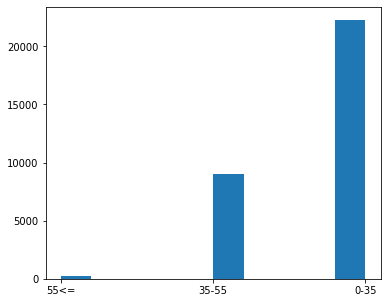

In [197]:
f = plt.figure()
f.set_figwidth(6)
f.set_figheight(5)
plt.hist(studentInfo.age_band)
plt.show()

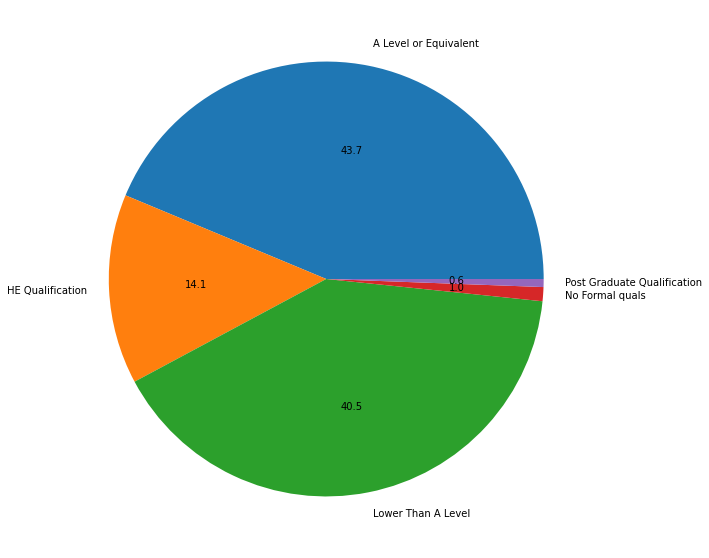

In [198]:
count_per_education = studentInfo.groupby('highest_education').count().loc[:,'id_student'].values
education_student = studentInfo.groupby('highest_education').count().index.values

f = plt.figure()
f.set_figwidth(12)
f.set_figheight(10)
plt.pie(count_per_education, labels=education_student, autopct='%.1f')
plt.show()

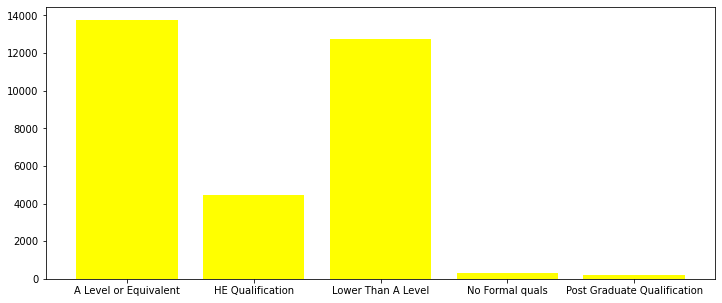

In [199]:
count_per_education = studentInfo.groupby('highest_education').count().loc[:,'id_student'].values
education_student = studentInfo.groupby('highest_education').count().index.values

f = plt.figure()
f.set_figwidth(12)
f.set_figheight(5)
plt.bar(education_student, count_per_education, color='yellow')
plt.show()

In [200]:
#mask_disability = studentInfo.disability == 'N'


#count_per_education_nodis = studentInfo.loc[~mask_disability,:].groupby('highest_education').count().loc[:,'id_student'].values
#count_per_education_dis = studentInfo.loc[mask_disability,:].groupby('highest_education').count().loc[:,'id_student'].values
#educ_stud = studentInfo.groupby('highest_education').count().index.values

# plot
#plt.bar(educ_stud, count_per_education_dis, color='green', label='no disability')
#plt.bar(educ_stud, count_per_education_nodis, color='red', label='with disability', bottom=count_per_education_nodis)
#plt.legend(loc='best')
#plt.grid()
#plt.show()



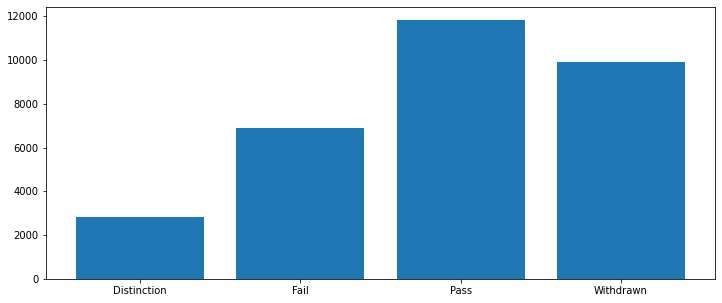

In [201]:
count_per_final_result = studentInfo.groupby('final_result').count().loc[:,'id_student'].values
title_name = studentInfo.groupby('final_result').count().index.values

f = plt.figure()
f.set_figwidth(12)
f.set_figheight(5)
plt.bar(title_name, count_per_final_result)
plt.show()

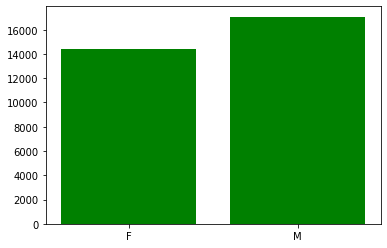

In [202]:
count_per_gender = studentInfo.groupby('gender').count().loc[:,'id_student'].values
title_name = studentInfo.groupby('gender').count().index.values

plt.bar(title_name, count_per_gender, color='green')
plt.show()

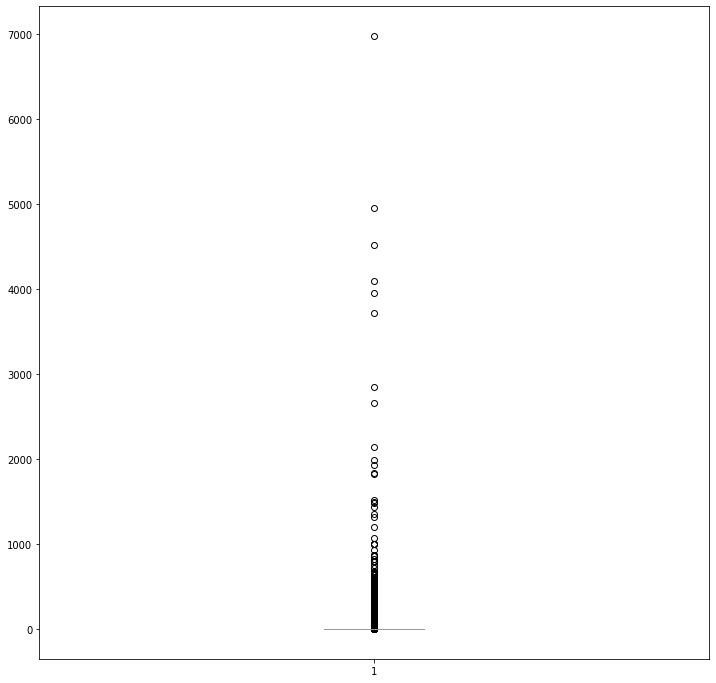

In [203]:
f = plt.figure()
f.set_figwidth(12)
f.set_figheight(12)
plt.boxplot(studentVle.sum_click)
plt.show()

# Joinanje tablica

In [204]:
tablica = pd.merge(studentAssessment2, studentInfo4, on="id_student")
tablica = pd.merge(tablica, studentRegistration, on="id_student")
tablica = pd.merge(tablica, studentVle3, on="id_student")
tablica.drop(columns=['code_module', 'id_assessment', 'id_student', 'code_presentation', 'date_unregistration' ], inplace=True)

education = {'Lower Than A Level': 0,'A Level or Equivalent': 1, 'HE Qualification': 2, 'Post Graduate Qualification': 3}
tablica.highest_education = [education[item] for item in tablica.highest_education]

age = {'0-35': 0,'35-55': 1, '55<=': 2}
tablica.age_band = [age[item] for item in tablica.age_band]

result = {'Withdrawn': 0,'Fail': 1, 'Pass': 2, 'Distinction': 3}
tablica.final_result = [result[item] for item in tablica.final_result]

display(tablica)

,score,num_of_prev_attempts,gender,highest_education,age_band,disability,final_result,date_registration,sum_click
0,78.0,0,1,2,2,0,2,-159.0,98
1,70.0,0,0,2,1,0,2,-53.0,215
2,72.0,0,0,1,1,0,2,-52.0,169
3,69.0,0,0,0,0,0,2,-176.0,295
4,79.0,0,1,1,1,0,2,-110.0,277
...,...,...,...,...,...,...,...,...,...
402,70.0,0,1,1,0,0,2,-31.0,44
403,86.0,0,1,1,1,0,3,-71.0,184
404,86.0,0,0,1,0,0,3,-109.0,228
405,89.0,0,1,1,1,0,2,-170.0,14


In [205]:
X = tablica.drop(columns=['final_result', 'disability', 'num_of_prev_attempts'])
y = tablica['final_result']

display(X)
display(y)

,score,gender,highest_education,age_band,date_registration,sum_click
0,78.0,1,2,2,-159.0,98
1,70.0,0,2,1,-53.0,215
2,72.0,0,1,1,-52.0,169
3,69.0,0,0,0,-176.0,295
4,79.0,1,1,1,-110.0,277
...,...,...,...,...,...,...
402,70.0,1,1,0,-31.0,44
403,86.0,1,1,1,-71.0,184
404,86.0,0,1,0,-109.0,228
405,89.0,1,1,1,-170.0,14


0      2
1      2
2      2
3      2
4      2
      ..
402    2
403    3
404    3
405    2
406    2
Name: final_result, Length: 407, dtype: int64

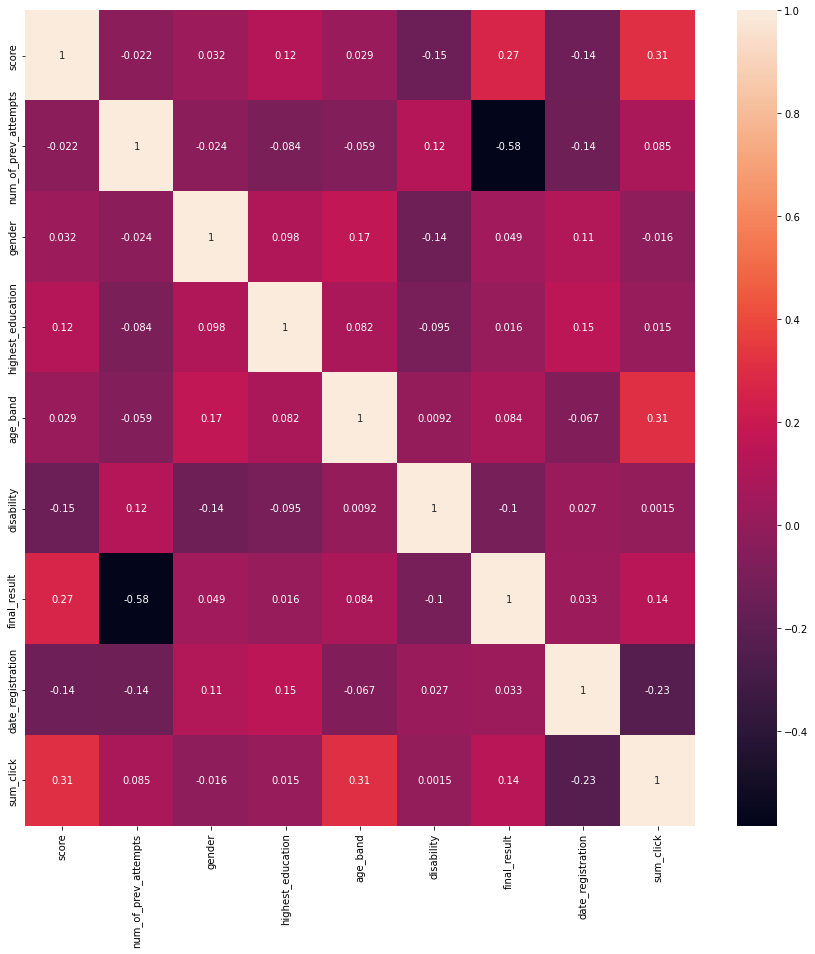

In [206]:
corrMatrix = tablica.corr()
plt.figure(figsize=(15, 15))
sns.heatmap(corrMatrix, annot=True)
plt.show()

In [207]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [208]:
from sklearn import tree
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.ensemble import RandomForestClassifier
import scipy

result = {'Withdrawn': 0,'Fail': 1, 'Pass': 2, 'Distinction': 3}
print('Decision Tree')
print()
print("Withdrawn:")
y1 = np.array([1 if y_1== 0 else 0 for y_1 in y_train])
y1_test = np.array([1 if y_1== 0 else 0 for y_1 in y_test])
#print(y1)
h1 = tree.DecisionTreeClassifier().fit(X_train, y1)
y1_pred = h1.predict(X_test)
print('Precision: %.3f' % precision_score(y1_test, y1_pred))
print('Recall: %.3f' % recall_score(y1_test, y1_pred))
print('F1 Score: %.3f' % f1_score(y1_test, y1_pred))
print('Accuracy: %.3f' % accuracy_score(y1_test, y1_pred))

print()
print("Fail: ")
y2 = np.array([1 if y_2== 1 else 0 for y_2 in y_train])
y2_test = np.array([1 if y_2== 1 else 0 for y_2 in y_test])
#print(y2)
h2 = tree.DecisionTreeClassifier().fit(X_train, y2)
y2_pred = h2.predict(X_test)
print('Precision: %.3f' % precision_score(y2_test, y2_pred))
print('Recall: %.3f' % recall_score(y2_test, y2_pred))
print('F1 Score: %.3f' % f1_score(y2_test, y2_pred))
print('Accuracy: %.3f' % accuracy_score(y2_test, y2_pred))

print()
print("Pass: ")
y3 = np.array([1 if y_3== 2 else 0 for y_3 in y_train])
y3_test = np.array([1 if y_3== 2 else 0 for y_3 in y_test])
#print(y3)
h3 = tree.DecisionTreeClassifier().fit(X_train, y3)
y3_pred = h3.predict(X_test)
print('Precision: %.3f' % precision_score(y3_test, y3_pred))
print('Recall: %.3f' % recall_score(y3_test, y3_pred))
print('F1 Score: %.3f' % f1_score(y3_test, y3_pred))
print('Accuracy: %.3f' % accuracy_score(y3_test, y3_pred))

print()
print("Distinction: ")
y4 = np.array([1 if y_3== 3 else 0 for y_3 in y_train])
y4_test = np.array([1 if y_3== 3 else 0 for y_3 in y_test])
#print(y4)
h4 = tree.DecisionTreeClassifier().fit(X_train, y4)
y4_pred = h4.predict(X_test)
print('Precision: %.3f' % precision_score(y4_test, y4_pred))
print('Recall: %.3f' % recall_score(y4_test, y4_pred))
print('F1 Score: %.3f' % f1_score(y4_test, y4_pred))
print('Accuracy: %.3f' % accuracy_score(y4_test, y4_pred))


#def predict2(i1, i2, i3, i4, X):
#  h = np.array([np.argmax([i1[i], i2[i], i3[i], i4[i]]) for i in range(len(X))])
#  print(h)
#  return h

#h = predict2(h1.predict(X_test), h2.predict(X_test), h3.predict(X_test), h4.predict(X_test), X_test)
print()
print('Random Forest')
print()
print("Withdrawn:")
y1 = np.array([1 if y_1== 0 else 0 for y_1 in y_train])
y1_test = np.array([1 if y_1== 0 else 0 for y_1 in y_test])
#print(y1)
h1 = RandomForestClassifier().fit(X_train, y1)
y1_pred = h1.predict(X_test)
print('Precision: %.3f' % precision_score(y1_test, y1_pred))
print('Recall: %.3f' % recall_score(y1_test, y1_pred))
print('F1 Score: %.3f' % f1_score(y1_test, y1_pred))
print('Accuracy: %.3f' % accuracy_score(y1_test, y1_pred))

print()
print("Fail: ")
y2 = np.array([1 if y_2== 1 else 0 for y_2 in y_train])
y2_test = np.array([1 if y_2== 1 else 0 for y_2 in y_test])
#print(y2)
h2 = RandomForestClassifier().fit(X_train, y2)
y2_pred = h2.predict(X_test)
print('Precision: %.3f' % precision_score(y2_test, y2_pred))
print('Recall: %.3f' % recall_score(y2_test, y2_pred))
print('F1 Score: %.3f' % f1_score(y2_test, y2_pred))
print('Accuracy: %.3f' % accuracy_score(y2_test, y2_pred))

print()
print("Pass: ")
y3 = np.array([1 if y_3== 2 else 0 for y_3 in y_train])
y3_test = np.array([1 if y_3== 2 else 0 for y_3 in y_test])
#print(y3)
h3 = RandomForestClassifier().fit(X_train, y3)
y3_pred = h3.predict(X_test)
print('Precision: %.3f' % precision_score(y3_test, y3_pred))
print('Recall: %.3f' % recall_score(y3_test, y3_pred))
print('F1 Score: %.3f' % f1_score(y3_test, y3_pred))
print('Accuracy: %.3f' % accuracy_score(y3_test, y3_pred))

print()
print("Distinction: ")
y4 = np.array([1 if y_3== 3 else 0 for y_3 in y_train])
y4_test = np.array([1 if y_3== 3 else 0 for y_3 in y_test])
#print(y4)
h4 = RandomForestClassifier().fit(X_train, y4)
y4_pred = h4.predict(X_test)
print('Precision: %.3f' % precision_score(y4_test, y4_pred))
print('Recall: %.3f' % recall_score(y4_test, y4_pred))
print('F1 Score: %.3f' % f1_score(y4_test, y4_pred))
print('Accuracy: %.3f' % accuracy_score(y4_test, y4_pred))

Decision Tree

Withdrawn:
Precision: 0.154
Recall: 0.353
F1 Score: 0.214
Accuracy: 0.642

Fail: 
Precision: 0.182
Recall: 0.167
F1 Score: 0.174
Accuracy: 0.846

Pass: 
Precision: 0.698
Recall: 0.506
F1 Score: 0.587
Accuracy: 0.496

Distinction: 
Precision: 0.200
Recall: 0.143
F1 Score: 0.167
Accuracy: 0.919

Random Forest

Withdrawn:
Precision: 0.185
Recall: 0.294
F1 Score: 0.227
Accuracy: 0.724

Fail: 
Precision: 0.000
Recall: 0.000
F1 Score: 0.000
Accuracy: 0.862

Pass: 
Precision: 0.753
Recall: 0.667
F1 Score: 0.707
Accuracy: 0.610

Distinction: 
Precision: 0.000
Recall: 0.000
F1 Score: 0.000
Accuracy: 0.943
